In [1]:
import numpy as np
from keras.layers import Dense, LSTM, Dropout, Convolution2D, MaxPool2D, Flatten, Reshape
from keras.models import Sequential
from keras.utils import to_categorical
from seqframe.seqframe import seq_frame


2023-07-09 10:34:17.847085: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-09 10:34:17.848859: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 10:34:17.883263: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-09 10:34:17.883742: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 10:34:18.431284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

# Model

In [2]:

model = Sequential()
model.add(Convolution2D(32, kernel_size=(5,5), strides=3))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Convolution2D(64, kernel_size=(3,3), strides=2))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Convolution2D(128, kernel_size=(3,3), strides=1))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [3]:
model.build((13200, 191, 107, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (13200, 63, 35, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2  (13200, 31, 17, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (13200, 15, 8, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (13200, 7, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (13200, 5, 2, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (13200, 2, 1, 128)        0

In [4]:
model.load_weights('model2_2.h5')

# Get ABS_INFO  

In [5]:
import os
import subprocess
import numpy as np

def abs_info():    
    pipe = subprocess.Popen(["libinput", "record", "/dev/input/event7"], stdout=subprocess.PIPE)

    ## ABS INFO
    window = []
    ABS_INFO={}
    ABS_FLAG = -1
    with pipe.stdout as stream:
        while not pipe.poll():
            try:
                line = next(stream).decode().strip()
                if line.startswith('absinfo:'):
                    line = next(stream).decode().strip()
                    ABS_FLAG = 1
                elif line.startswith('properties:'):
                    ABS_FLAG=0
                
                if ABS_FLAG==1:
                    key, value = line.split(':')
                    ABS_INFO[int(key)] = eval(value)
                    # print(line)
                elif ABS_FLAG==0:
                    break
                
            except KeyboardInterrupt:
                break
            
    pipe.kill()
    return ABS_INFO


# Display

In [6]:
# ABS_INFO = abs_info()

# DISPLAY_SCALE = 2
# MAX_LEN = ABS_INFO[0][1]/DISPLAY_SCALE
# MAX_WID = ABS_INFO[1][1]/DISPLAY_SCALE
# x=0
# y=0
words = ['hello', 'world', 'i_am', 'yash']


# import pygame
# from sys import exit
# from time import time

# # t = time()

# pygame.init()
# screen = pygame.display.set_mode((MAX_LEN, MAX_WID))

# # pointer =  pygame.Surface((1,1))
# P_WID = 5
# P_HEI = 5
# REFRESH=-1

m, n = (1919, 1079)
# sample_rate = 10
# SAMPLE_SCALE = 10
# samples = []
# sample = np.zeros((m//SAMPLE_SCALE, n//SAMPLE_SCALE)).astype('uint8')

# pipe = subprocess.Popen(["libinput", "record", "/dev/input/event7"], stdout=subprocess.PIPE)
# window = []
# WINDOW_SIZE=1100
# EVENTS_FLAG = -1
# ptr = 0

# with pipe.stdout as stream:
#     while not pipe.poll():
#         try:

#             if REFRESH == -1:
#                 try:
#                     pygame.display.set_caption(f"{words[y_hat]}")
#                 except:
#                     pygame.display.set_caption("write something")
                    
#             else:
#                 # pygame.display.set_caption('down_pressed')
#                 samples = []
#                 sample = np.zeros((m//SAMPLE_SCALE, n//SAMPLE_SCALE)).astype('uint8')
#                 screen.fill((0,0,0))
#                 X_test = 0
#                 REFRESH = -1
                
                
#             pygame.draw.rect(screen, (255, 0, 0), (x, y, P_WID, P_HEI))
#             pygame.display.update()
            
            
#             line = next(stream).decode().strip()
#             if line.startswith('events:'):
#                 EVENTS_FLAG = 1
#                 continue
            
#             if EVENTS_FLAG==1:
#                 if line.startswith('#') or line.startswith('- evdev:'):
#                     continue
                
#                 # window.append(eval(line.split('#')[0].strip('- ')))
#                 # window = window[::-1][0:min(len(window), WINDOW_SIZE)]

#                 # e = window[0]
#                 e = eval(line.split('#')[0].strip('- '))
#                 if e[2]==3:
#                     if e[3]==0:
#                         x = e[-1]/DISPLAY_SCALE
#                     if e[3]==1:
#                         y = e[-1]/DISPLAY_SCALE
                    
#                     if REFRESH == -1:
#                         window.append(np.array([x,y]))
#                         sample[int(x//SAMPLE_SCALE)][int(y//SAMPLE_SCALE)] = 1
#                         samples.append(sample.reshape((m//SAMPLE_SCALE, n//SAMPLE_SCALE,1)))
#                         samples = samples[::-1][0:min(len(samples), 5)]
#                         ptr += 1
#                         print(np.sum(samples))
#                         if ptr > 500:
#                             X_test = np.array(samples)
#                             preds = model.predict(X_test)
#                             y_hat = np.argmax(np.mean(preds,axis=1))
#                             # print(words[y_hat])
#                             # print(X_test.shape)
#                             X_test = 0
#                             ptr = 0
                        
#                     else:
#                         window.append(np.array([0,0]))
                    
#                     window = window[::-1][0:min(len(window), WINDOW_SIZE)]
                    
#                     # print(window[0])
#                     # print(window[min(np.random.randint(0,sample_rate), len(window))])
                    
                    
#                     for event in pygame.event.get():
#                         if event.type == pygame.KEYDOWN:
#                             REFRESH = 1

#                         if event.type == pygame.QUIT:
#                             pipe.kill()
#                             pygame.quit()
#                             break
                        
                        
#         except KeyboardInterrupt:
#             break
#     pipe.kill()
#     pygame.quit()      


# Single Display

In [11]:
q=1
for_disp = []
while q==1:
    ABS_INFO = abs_info()
    SCALE = 2
    MAX_LEN = ABS_INFO[0][1]/SCALE
    MAX_WID = ABS_INFO[1][1]/SCALE
    x=0
    y=0

    import pygame

    pygame.init()
    screen = pygame.display.set_mode((MAX_LEN, MAX_WID))

    
    P_WID = 5
    P_HEI = 5
    
    temp = []
    finished=-1
    pipe = subprocess.Popen(["libinput", "record", "/dev/input/event7"], stdout=subprocess.PIPE)
    window = []
    WINDOW_SIZE=1500
    EVENTS_FLAG = -1

    with pipe.stdout as stream:
        while not pipe.poll():
            try:
            # try:
                pygame.draw.rect(screen, (255, 0, 0), (x, y, P_WID, P_HEI))
                pygame.display.update()
            except (KeyboardInterrupt, Exception):
                q=-1        # for pygame window crash while exit
                break
                
            # except:
            #     break

            
            line = next(stream).decode().strip()
            
            if line.startswith('events:'):
                EVENTS_FLAG = 1
                continue
            
            if EVENTS_FLAG==1:
                if line.startswith('#') or line.startswith('- evdev:'):
                    continue
                
                # keep track of limited incoming events
                window.append(eval(line.split('#')[0].strip('- ')))
                window = window[::-1][0:min(len(window), 1)]
                e = window[0]
                if e[2]==3:
                    if e[3]==0:
                        x = e[-1]/SCALE
                    if e[3]==1:
                        y = e[-1]/SCALE
                    
                    if finished == -1:
                        temp.append(np.array([x,y]))
                    else:
                        temp.append(np.array([0,0]))
                    
                    # event check
                    for event in pygame.event.get():
                        # stops the input to sample and passes (0,0) instead
                        if event.type == pygame.KEYDOWN:
                            finished = 1
                            
                        if event.type == pygame.QUIT:
                            pygame.quit()
                            pipe.kill()
                            break
                        
                    # frames == threshold  
                    if len(temp)==WINDOW_SIZE:
                        break
            
            
            
    

            
        pipe.kill()
        pygame.quit()      

    a = np.array(temp)                  # sparse matrix image
    samp = np.zeros((m//10, n//10))     # dense matrix init
    samp = samp.astype('uint8')
    
    for_disp.append(samp)
    for_disp = for_disp[::-1][0:min(len(for_disp), 5)]      # keeps last 5 images
    # sparse to dense matrix conversion of npy image
    for cord in a:
        samp[int(cord[0]//10)][int(cord[1]//10)] = 1

    samp = samp.reshape((1, 191, -1, 1))
    pred = model.predict(samp)
    print(words[np.argmax(pred)])
    # pygame.display.set_caption(f'{words[np.argmax(pred)]}')



# Recording to 'stdout'.
# Recording to 'stdout'.


1/1 [==============================] - 0s 38ms/step
world


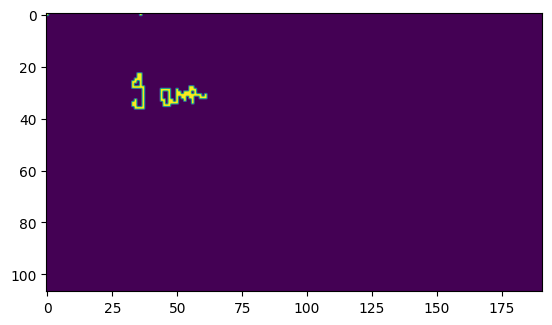

In [85]:
import matplotlib.pyplot as plt
k = np.random.randint(0, len(for_disp))
plt.imshow(for_disp[k].T)


In [86]:
# model.predict()
samp = for_disp[k].reshape((1, 191, -1, 1))

In [87]:
pred = model.predict(samp)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


In [88]:
words[np.argmax(pred)]

'i_am'